## Step 1: Import Libraries and Load the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
dataset_link = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips_df = pd.read_csv(dataset_link)

# Display the first few rows and information about the dataset
print("Dataset Head:")
print(tips_df.head())
print("\nDataset Info:")
tips_df.info()

Dataset Head:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## Step 2: Data Preprocessing and Visualization

check for missing values and then visualize the relationship between 'total_bill' (independent variable) and 'tip' (dependent variable) using a scatter plot.


Missing Values:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


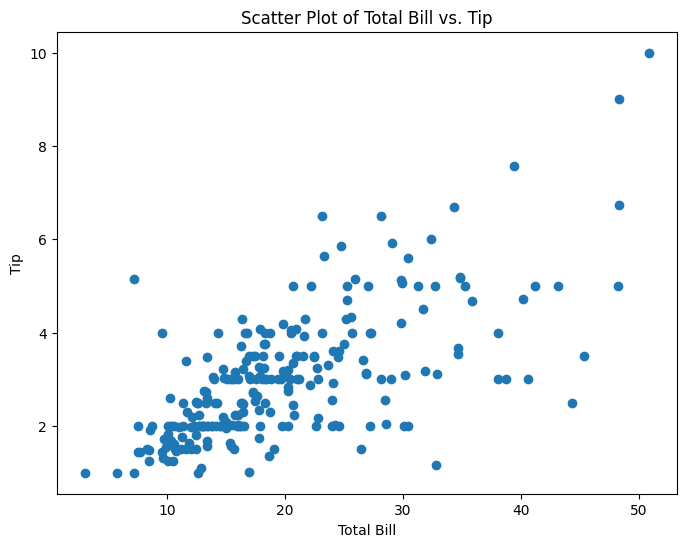

In [2]:
# Check for missing values
print("\nMissing Values:")
print(tips_df.isnull().sum())

# Convert categorical features to numerical using one-hot encoding
tips_df_encoded = pd.get_dummies(tips_df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Visualize the relationship between 'total_bill' and 'tip'
plt.figure(figsize=(8, 6))
plt.scatter(tips_df_encoded['total_bill'], tips_df_encoded['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter Plot of Total Bill vs. Tip')
plt.show()

## Step 3: Model Building

In [3]:
# Define independent and dependent variables
X = tips_df_encoded[['total_bill']]
y = tips_df_encoded['tip']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print the model coefficients
print(f"\nModel Intercept: {model.intercept_}")
print(f"Model Coefficient (for total_bill): {model.coef_[0]}")


Model Intercept: 0.925235558557056
Model Coefficient (for total_bill): 0.10696370685268658


## Step 4: Model Evaluation


Mean Squared Error (MSE): 0.57
R-squared (R2): 0.54


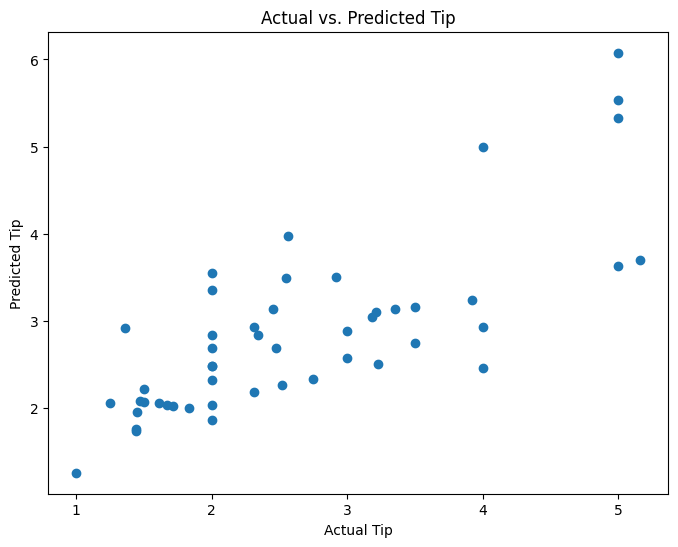

In [4]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize the actual vs. predicted tips
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.title('Actual vs. Predicted Tip')
plt.show()


## Basic Command-Line Chatbot Interface ---

In [ ]:
def chatbot_response(user_input):
    """Processes user input and provides a response."""
    user_input_lower = user_input.lower()

    if "hello" in user_input_lower or "hi" in user_input_lower:
        return "Hello! I can answer questions about the simple linear regression model for tips. What would you like to know?"
    elif "dataset info" in user_input_lower or "about the dataset" in user_input_lower:
        print("\nDataset Head:")
        print(tips_df.head())
        print("\nDataset Info:")
        tips_df.info()
        return "Displayed dataset information."
    elif "missing values" in user_input_lower:
        print("\nMissing Values:")
        print(tips_df.isnull().sum())
        return "Displayed missing values check."
    elif "scatter plot" in user_input_lower or "relationship" in user_input_lower:
        print("Displaying the scatter plot of Total Bill vs. Tip...")
        plt.figure(figsize=(8, 6))
        plt.scatter(tips_df_encoded['total_bill'], tips_df_encoded['tip'])
        plt.xlabel('Total Bill')
        plt.ylabel('Tip')
        plt.title('Scatter Plot of Total Bill vs. Tip')
        plt.show()
        return "Scatter plot displayed."
    elif "model coefficients" in user_input_lower or "equation" in user_input_lower:
        return f"Model Intercept: {model.intercept_:.2f}\nModel Coefficient (for total_bill): {model.coef_[0]:.2f}"
    elif "predict tip for" in user_input_lower:
        try:
            parts = user_input_lower.split("for")
            if len(parts) > 1:
                # Attempt to extract a number after "for"
                amount_str = parts[1].strip().split()[0].replace('$', '') # Handle potential dollar signs
                total_bill = float(amount_str)
                predicted_tip = model.predict([[total_bill]])[0]
                return f"For a total bill of ${total_bill:.2f}, the predicted tip is ${predicted_tip:.2f}"
            else:
                return "Please provide the total bill amount for prediction (e.g., 'predict tip for 20')."
        except (ValueError, IndexError):
            return "Sorry, I couldn't understand the total bill amount. Please provide a number."
    elif "model performance" in user_input_lower or "mse" in user_input_lower or "r2" in user_input_lower:
        return f"Mean Squared Error (MSE): {mse:.2f}\nR-squared (R2): {r2:.2f}"
    elif "quit" in user_input_lower or "exit" in user_input_lower:
        return "Goodbye!"
    else:
        return "Sorry, I didn't understand your request. You can ask about 'dataset info', 'scatter plot', 'model coefficients', 'predict tip for [amount]', 'model performance', or 'quit'."

# --- Main Chatbot Loop ---

if __name__ == "__main__":
    print("Simple Linear Regression Tips Chatbot")
    print("Type 'quit' or 'exit' to end the conversation.")

    while True:
        user_input = input("You: ")
        response = chatbot_response(user_input)
        print("Bot:", response)

        if user_input.lower() in ["quit", "exit"]:
            break

Simple Linear Regression Tips Chatbot
Type 'quit' or 'exit' to end the conversation.
Bot: Sorry, I didn't understand your request. You can ask about 'dataset info', 'scatter plot', 'model coefficients', 'predict tip for [amount]', 'model performance', or 'quit'.
Bot: Hello! I can answer questions about the simple linear regression model for tips. What would you like to know?
